# Combined Dataset - Feed Forward Neural Network
## Essentia Best Valence Mean Featureset

## Import relevant libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torcheval.metrics import R2Score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import math

import sys

## Neural Network Training

### Import annotations dataset

In [2]:
df_annotations = pd.read_csv('../../data/combined/annotations/combined_static_annotations.csv')
df_annotations

song_id  valence_mean_mapped  arousal_mean_mapped
0         deam_2               -0.475               -0.500
1         deam_3               -0.375               -0.425
2         deam_4                0.175                0.125
3         deam_5               -0.150                0.075
4         deam_7                0.200                0.350
...          ...                  ...                  ...
2506   pmemo_993                0.525                0.725
2507   pmemo_996                0.125                0.750
2508   pmemo_997                0.325                0.425
2509   pmemo_999                0.550                0.750
2510  pmemo_1000                0.150                0.325

[2511 rows x 3 columns]

### Import the featureset

This is where you should change between normalised and standardised, and untouched featuresets!

In [3]:
df_essentia_best_valence_features_mean = pd.read_csv('../../data/combined/features/normalised_essentia_best_valence_features.csv')

df_essentia_best_valence_features_mean

song_id  lowlevel.melbands_kurtosis.mean  \
0         deam_2                         0.023745   
1         deam_3                         0.082083   
2         deam_4                         0.018062   
3         deam_5                         0.016018   
4         deam_7                         0.107675   
...          ...                              ...   
2506   pmemo_993                         0.019068   
2507   pmemo_996                         0.037488   
2508   pmemo_997                         0.015505   
2509   pmemo_999                         0.020577   
2510  pmemo_1000                         0.010435   

      lowlevel.melbands_skewness.mean  lowlevel.spectral_energy.mean  \
0                            0.224209                       0.054855   
1                            0.348482                       0.211289   
2                            0.213582                       0.084731   
3                            0.181322                       0.041096   
4                            0.349349                       0.197274   
...                               ...                            ...   
2506                         0.184507                       0.069237   
2507                         0.213255                       0.067479   
2508                         0.192911                       0.072763   
2509                         0.215383                       0.087517   
2510                         0.178306                       0.061554   

      lowlevel.zerocrossingrate.mean  rhythm.beats_loudness.mean  \
0                           0.087567                    0.069568   
1                           0.019437                    0.338074   
2                           0.090074                    0.135489   
3                           0.086854                    0.063757   
4                           0.017629                    0.260381   
...                              ...                         ...   
2506                        0.252758                    0.126037   
2507                        0.295555                    0.078758   
2508                        0.290117                    0.101510   
2509                        0.306891                    0.141377   
2510                        0.324218                    0.085250   

      rhythm.onset_rate  tonal.chords_strength.mean  tonal.hpcp_entropy.mean  \
0              0.373016                    0.368995                 0.631265   
1              0.357421                    0.378784                 0.543954   
2              0.513626                    0.622282                 0.554446   
3              0.378601                    0.612692                 0.395875   
4              0.637566                    0.171114                 0.602087   
...                 ...                         ...                      ...   
2506           0.425810                    0.609474                 0.543563   
2507           0.511932                    0.606481                 0.597607   
2508           0.404064                    0.247924                 0.537197   
2509           0.342520                    0.241649                 0.482534   
2510           0.275951                    0.416496                 0.555875   

      tonal.key_edma.strength  ...  tonal.chords_histogram_14  \
0                    0.625203  ...                   0.023256   
1                    0.676631  ...                   0.000000   
2                    0.593308  ...                   0.000000   
3                    0.899957  ...                   0.000000   
4                    0.450332  ...                   0.000000   
...                       ...  ...                        ...   
2506                 0.680168  ...                   0.000000   
2507                 0.701782  ...                   0.000000   
2508                 0.632447  ...                   0.006023   
2509                 0.568029  ...                   0.000000   
2510          

In [4]:
df_essentia_best_valence_features_mean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 67 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   song_id                                  2511 non-null   object 
 1   lowlevel.melbands_kurtosis.mean          2511 non-null   float64
 2   lowlevel.melbands_skewness.mean          2511 non-null   float64
 3   lowlevel.spectral_energy.mean            2511 non-null   float64
 4   lowlevel.zerocrossingrate.mean           2511 non-null   float64
 5   rhythm.beats_loudness.mean               2511 non-null   float64
 6   rhythm.onset_rate                        2511 non-null   float64
 7   tonal.chords_strength.mean               2511 non-null   float64
 8   tonal.hpcp_entropy.mean                  2511 non-null   float64
 9   tonal.key_edma.strength                  2511 non-null   float64
 10  tonal.key_temperley.strength             2511 no

Join both the featureset and annotation set together

In [5]:
df_essentia_best_valence_features_mean_whole = pd.merge(df_essentia_best_valence_features_mean, df_annotations, how='inner', on='song_id')
df_essentia_best_valence_features_mean_whole = df_essentia_best_valence_features_mean_whole.drop('song_id', axis=1)
df_essentia_best_valence_features_mean_whole

lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.spectral_energy.mean  lowlevel.zerocrossingrate.mean  \
0                          0.054855                        0.087567   
1                          0.211289                        0.019437   
2                          0.084731                        0.090074   
3                          0.041096                        0.086854   
4                          0.197274                        0.017629   
...                             ...                             ...   
2506                       0.069237                        0.252758   
2507                       0.067479                        0.295555   
2508                       0.072763                        0.290117   
2509                       0.087517                        0.306891   
2510                       0.061554                        0.324218   

      rhythm.beats_loudness.mean  rhythm.onset_rate  \
0                       0.069568           0.373016   
1                       0.338074           0.357421   
2                       0.135489           0.513626   
3                       0.063757           0.378601   
4                       0.260381           0.637566   
...                          ...                ...   
2506                    0.126037           0.425810   
2507                    0.078758           0.511932   
2508                    0.101510           0.404064   
2509                    0.141377           0.342520   
2510                    0.085250           0.275951   

      tonal.chords_strength.mean  tonal.hpcp_entropy.mean  \
0                       0.368995                 0.631265   
1                       0.378784                 0.543954   
2                       0.622282                 0.554446   
3                       0.612692                 0.395875   
4                       0.171114                 0.602087   
...                          ...                      ...   
2506                    0.609474                 0.543563   
2507                    0.606481                 0.597607   
2508                    0.247924                 0.537197   
2509                    0.241649                 0.482534   
2510                    0.416496                 0.555875   

      tonal.key_edma.strength  tonal.key_temperley.strength  ...  \
0                    0.625203                      0.588560  ...   
1                    0.676631                      0.672442  ...   
2                    0.593308                      0.566277  ...   
3                    0.899957                      0.893002  ...   
4                    0.450332                      0.428595  ...   
...                       ...                           ...  ...   
2506                 0.680168                      0.722960  ...   
2507                 0.701782                      0.725393  ...   
2508                 0.632447                      0.661167  ...   
2509                 0.568029                      0.606221  ...   
2510                 0.506959                      0.501535  ...   

      tonal.chords_histogram_16  tonal.chords_histogr

#### Prepare dataframes for the neural network

Perform splitting of the dataframe into training and testing sets

In [6]:
features = df_essentia_best_valence_features_mean.drop('song_id', axis=1)
features

lowlevel.melbands_kurtosis.mean  lowlevel.melbands_skewness.mean  \
0                            0.023745                         0.224209   
1                            0.082083                         0.348482   
2                            0.018062                         0.213582   
3                            0.016018                         0.181322   
4                            0.107675                         0.349349   
...                               ...                              ...   
2506                         0.019068                         0.184507   
2507                         0.037488                         0.213255   
2508                         0.015505                         0.192911   
2509                         0.020577                         0.215383   
2510                         0.010435                         0.178306   

      lowlevel.spectral_energy.mean  lowlevel.zerocrossingrate.mean  \
0                          0.054855                        0.087567   
1                          0.211289                        0.019437   
2                          0.084731                        0.090074   
3                          0.041096                        0.086854   
4                          0.197274                        0.017629   
...                             ...                             ...   
2506                       0.069237                        0.252758   
2507                       0.067479                        0.295555   
2508                       0.072763                        0.290117   
2509                       0.087517                        0.306891   
2510                       0.061554                        0.324218   

      rhythm.beats_loudness.mean  rhythm.onset_rate  \
0                       0.069568           0.373016   
1                       0.338074           0.357421   
2                       0.135489           0.513626   
3                       0.063757           0.378601   
4                       0.260381           0.637566   
...                          ...                ...   
2506                    0.126037           0.425810   
2507                    0.078758           0.511932   
2508                    0.101510           0.404064   
2509                    0.141377           0.342520   
2510                    0.085250           0.275951   

      tonal.chords_strength.mean  tonal.hpcp_entropy.mean  \
0                       0.368995                 0.631265   
1                       0.378784                 0.543954   
2                       0.622282                 0.554446   
3                       0.612692                 0.395875   
4                       0.171114                 0.602087   
...                          ...                      ...   
2506                    0.609474                 0.543563   
2507                    0.606481                 0.597607   
2508                    0.247924                 0.537197   
2509                    0.241649                 0.482534   
2510                    0.416496                 0.555875   

      tonal.key_edma.strength  tonal.key_temperley.strength  ...  \
0                    0.625203                      0.588560  ...   
1                    0.676631                      0.672442  ...   
2                    0.593308                      0.566277  ...   
3                    0.899957                      0.893002  ...   
4                    0.450332                      0.428595  ...   
...                       ...                           ...  ...   
2506                 0.680168                      0.722960  ...   
2507                 0.701782                      0.725393  ...   
2508                 0.632447                      0.661167  ...   
2509                 0.568029                      0.606221  ...   
2510                 0.506959                      0.501535  ...   

      tonal.chords_histogram_14  tonal.chords_histogr

In [7]:
targets = df_annotations.drop('song_id', axis=1)
targets

valence_mean_mapped  arousal_mean_mapped
0                  -0.475               -0.500
1                  -0.375               -0.425
2                   0.175                0.125
3                  -0.150                0.075
4                   0.200                0.350
...                   ...                  ...
2506                0.525                0.725
2507                0.125                0.750
2508                0.325                0.425
2509                0.550                0.750
2510                0.150                0.325

[2511 rows x 2 columns]

Perform 80-20 train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

Create tensors for X_train and X_test

In [9]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float64)

Create tensors for Y_train and Y_test

In [10]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float64)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float64)

Define neural network parameters and instantitate neural network

In [11]:
input_size = 1
hidden_size = 20 
output_size = 2  # Output size for valence and arousal
learning_rate = 0.001
criterion = nn.MSELoss()

In [136]:
num_epochs = 580

Set a random seed to ensure consistent initial weights of the neural network

In [137]:
# Set the seed
seed = 42
torch.manual_seed(seed)

Define the neural network

In [138]:
sys.path.insert(1, '../../models')
from feedforward_nn_combined import NeuralNetworkCombined

#### Training

Prepare input_train_data and target_train_labels

In [139]:
input_train_data = X_train_tensor.float()

# input_train_data = input_train_data.view(input_train_data.shape[1], -1)
print(input_train_data.shape)

target_train_labels = y_train_tensor

torch.Size([2008, 66])


Training loop

In [140]:
def train_model(num_epochs):
  model = NeuralNetworkCombined(input_size=input_train_data.shape[1])
  optimiser = optim.Adam(model.parameters(), lr=learning_rate)
  
  for epoch in range(num_epochs):
    optimiser.zero_grad()
    
    # forward pass
    output = model(input_train_data)

    # calculate loss
    loss = torch.sqrt(criterion(output.float(), target_train_labels.float()))

    # backward pass
    loss.backward()
    # update weights
    optimiser.step()

    print(f'Epoch {epoch + 1}, Loss: {math.sqrt(loss.item())}')

  print("Training completed.")
  return model

In [141]:
model = train_model(num_epochs)

Epoch 1, Loss: 0.5921128943157891
Epoch 2, Loss: 0.591562785064419
Epoch 3, Loss: 0.591046805356635
Epoch 4, Loss: 0.5905413765215414
Epoch 5, Loss: 0.5900468287229917
Epoch 6, Loss: 0.5895630124188043
Epoch 7, Loss: 0.5890897263930872
Epoch 8, Loss: 0.588627780814578
Epoch 9, Loss: 0.5881772530720801
Epoch 10, Loss: 0.5877363946817348
Epoch 11, Loss: 0.5872958396699313
Epoch 12, Loss: 0.5868510436184702
Epoch 13, Loss: 0.5864296181685859
Epoch 14, Loss: 0.5860239855199534
Epoch 15, Loss: 0.5856310488084161
Epoch 16, Loss: 0.5852549582983854
Epoch 17, Loss: 0.5848971986514082
Epoch 18, Loss: 0.5845560446188721
Epoch 19, Loss: 0.5842316273129367
Epoch 20, Loss: 0.5839319620246491
Epoch 21, Loss: 0.583662550418608
Epoch 22, Loss: 0.5834211357204168
Epoch 23, Loss: 0.5831970214524365
Epoch 24, Loss: 0.5829819972266927
Epoch 25, Loss: 0.5827728002286354
Epoch 26, Loss: 0.5825687972768868
Epoch 27, Loss: 0.5823712475965487
Epoch 28, Loss: 0.5821809512152435
Epoch 29, Loss: 0.581999733090749

## Neural Network Testing

Prepare input_test_data and target_test_labels

In [142]:
input_test_data = X_test_tensor.float()

# input_test_data = input_test_data.view(input_test_data.shape[1], -1)
print(input_test_data.shape)

target_test_labels = y_test_tensor

torch.Size([503, 66])


Generating scores

In [143]:
def test_model(trained_model):
  with torch.no_grad():
    test_pred = trained_model(input_test_data)
    test_loss = criterion(test_pred.float(), target_test_labels)

    # Separate the output into valence and arousal
    valence_pred = test_pred[:, 0]
    arousal_pred = test_pred[:, 1]
        
    valence_target = target_test_labels[:, 0]
    arousal_target = target_test_labels[:, 1]

     # Calculate RMSE for valence and arousal separately
    valence_rmse = math.sqrt(mean_squared_error(valence_pred, valence_target))
    arousal_rmse = math.sqrt(mean_squared_error(arousal_pred, arousal_target))

  print(f'Valence RMSE: {round(valence_rmse, 4)}')
  print(f'Arousal RMSE: {round(arousal_rmse, 4)}')

  rmse = math.sqrt(test_loss.item())
  print(f'Test RMSE: {round(rmse, 4)}')

  metric = R2Score(multioutput="raw_values")
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test R^2 score: {adjusted_r2_score}')

  metric = R2Score()
  metric.update(test_pred, target_test_labels)
  r2_score = metric.compute()
  print(f'Test R^2 score (overall): {round(r2_score.item(), 4)}')

  metric = R2Score(multioutput="raw_values", num_regressors=input_test_data.shape[1])
  metric.update(test_pred, target_test_labels)
  adjusted_r2_score = metric.compute()
  print(f'Test Adjusted R^2 score: {adjusted_r2_score}')

  return test_pred, rmse, adjusted_r2_score, r2_score

In [144]:
test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)

Valence RMSE: 0.2416
Arousal RMSE: 0.2413
Test RMSE: 0.2415
Test R^2 score: tensor([0.4502, 0.5765], dtype=torch.float64)
Test R^2 score (overall): 0.5134
Test Adjusted R^2 score: tensor([0.3670, 0.5124], dtype=torch.float64)


In [21]:
torch.save(model.state_dict(), '../../models/combined_feedforward_nn_essentia_best_valence_mean_normalised.pt')

True values (test set)

In [22]:
target_test_labels

tensor([[ 0.0500, -0.0500],
        [ 0.2500,  0.1500],
        [ 0.0250,  0.4250],
        ...,
        [ 0.4000,  0.4000],
        [ 0.0250, -0.2000],
        [ 0.6500,  0.6750]], dtype=torch.float64)

Predicted values

In [23]:
test_pred

tensor([[-0.1868, -0.2288],
        [ 0.3676,  0.4423],
        [ 0.2241,  0.2678],
        ...,
        [ 0.1983,  0.2359],
        [ 0.1541,  0.1833],
        [ 0.2666,  0.3163]])

In [24]:
pred_valence = test_pred[:, 0]
pred_arousal = test_pred[1]
real_valence = target_test_labels[0]
real_arousal = target_test_labels[1]


metric = R2Score(multioutput='raw_values')
metric.update(test_pred, target_test_labels)
print(metric.compute())

tensor([0.4464, 0.5718], dtype=torch.float64)


## Analyse relationship between epochs and r^2 score

Create lists to store the epochs and R^2 scores

In [25]:
num_epochs_list = [i for i in range(1, 501)]
adjusted_r2_scores_valence_list = []
adjusted_r2_scores_arousal_list = []
r2_scores_list = []
rmse_list = []

Conduct training and testing for each num_epochs

In [26]:
for num_epochs in num_epochs_list:
  # Set the seed
  torch.manual_seed(seed)

  print(f'Num of epochs: {num_epochs}')
  
  model = train_model(num_epochs)

  print("Training completed.")
  print("Testing model...")

  test_pred, rmse, adjusted_r2_score, r2_score = test_model(model)
  adjusted_r2_scores_valence_list.append(adjusted_r2_score[0])
  adjusted_r2_scores_arousal_list.append(adjusted_r2_score[1])
  r2_scores_list.append(r2_score)
  rmse_list.append(rmse)

print("Completed.")

Num of epochs: 1
Epoch 1, Loss: 0.5921128943157891
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3507
Arousal RMSE: 0.374
Test RMSE: 0.3625
Test R^2 score: tensor([-0.1579, -0.0178], dtype=torch.float64)
Test R^2 score (overall): -0.0878
Test Adjusted R^2 score: tensor([-0.3332, -0.1718], dtype=torch.float64)
Num of epochs: 2
Epoch 1, Loss: 0.5921128943157891
Epoch 2, Loss: 0.591562785064419
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3494
Arousal RMSE: 0.3739
Test RMSE: 0.3619
Test R^2 score: tensor([-0.1497, -0.0169], dtype=torch.float64)
Test R^2 score (overall): -0.0833
Test Adjusted R^2 score: tensor([-0.3237, -0.1708], dtype=torch.float64)
Num of epochs: 3
Epoch 1, Loss: 0.5921128943157891
Epoch 2, Loss: 0.591562785064419
Epoch 3, Loss: 0.591046805356635
Training completed.
Training completed.
Testing model...
Valence RMSE: 0.3482
Arousal RMSE: 0.3737
Test RMSE: 0.3612
Test R^2 score: tensor([-0.1416, -0.0160], dtype=torch.f

### Plot the graph to visualise the relationship the evaluation metrics

Import relevant libraries

In [27]:
import matplotlib.pyplot as plt

#### RMSE vs. num_epochs

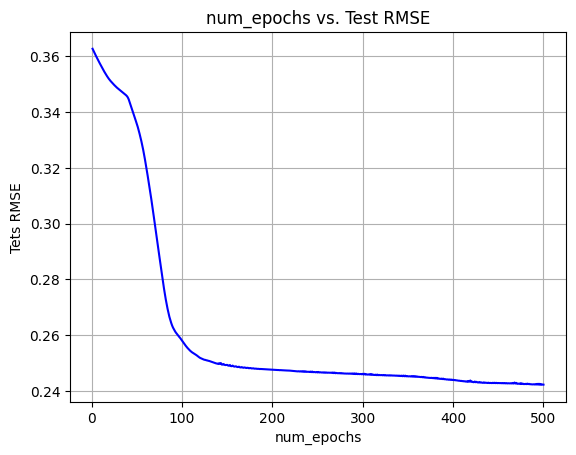

In [28]:
plt.plot(num_epochs_list, rmse_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test RMSE')
plt.xlabel('num_epochs')
plt.ylabel('Tets RMSE') 
plt.grid(True)
plt.show() 

In [29]:
min_rmse = min(rmse_list)
corresponding_r2_score = r2_scores_list[rmse_list.index(min_rmse)]
corresponding_num_epochs = num_epochs_list[rmse_list.index(min_rmse)]

print(f'Min RMSE score: {min_rmse}')
print(f'Corresponding R^2 SCore: {corresponding_r2_score}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Min RMSE score: 0.24232244099331465
Corresponding R^2 SCore: 0.5098923221750843
Corresponding num_epochs: 498


Test R^2 Score vs. num_epochs

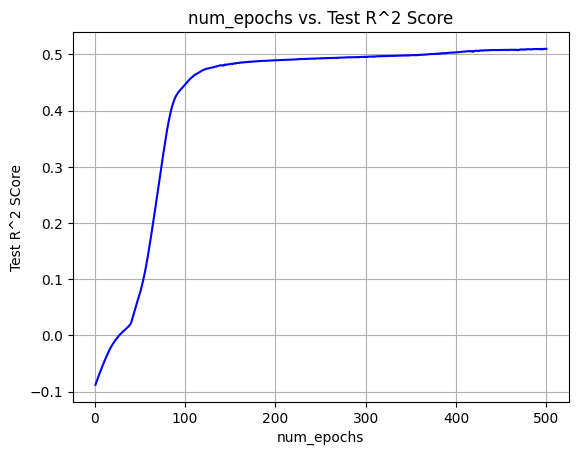

In [30]:
plt.plot(num_epochs_list, r2_scores_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test R^2 Score')
plt.xlabel('num_epochs')
plt.ylabel('Test R^2 SCore') 
plt.grid(True)
plt.show() 

In [31]:
max_r2_score = max(r2_scores_list)
corresponding_rmse = rmse_list[r2_scores_list.index(max_r2_score)]
corresponding_num_epochs = num_epochs_list[r2_scores_list.index(max_r2_score)]

print(f'Max R^2 score: {max_r2_score}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.5098923221750843
Corresponding RMSE: 0.24232244099331465
Corresponding num_epochs: 498


Test Adjusted R^2 Score (Valence) vs. num_epochs

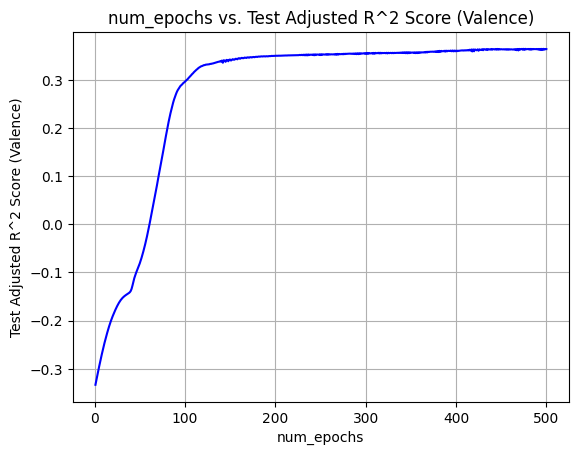

In [32]:
plt.plot(num_epochs_list, adjusted_r2_scores_valence_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Valence)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 Score (Valence)') 
plt.grid(True)
plt.show() 

In [33]:
max_r2_score_valence = max(adjusted_r2_scores_valence_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_valence_list.index(max_r2_score_valence)]

print(f'Max R^2 score: {max_r2_score_valence}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.3645382142220235
Corresponding RMSE: 0.24288818643750656
Corresponding num_epochs: 475


#### Test Adjusted R^2 Score (Arousal) vs. num_epochs

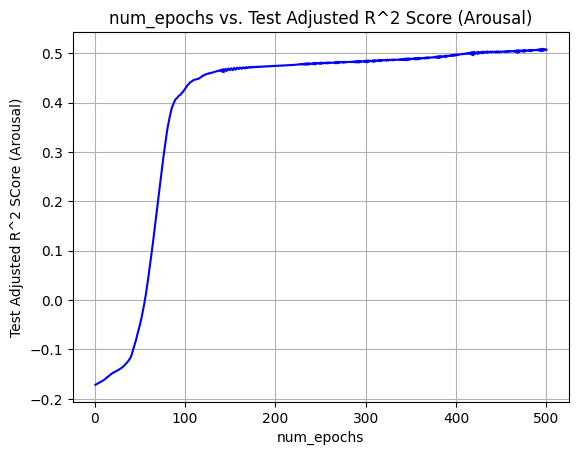

In [34]:
plt.plot(num_epochs_list, adjusted_r2_scores_arousal_list, color='b', linestyle='-')
plt.title('num_epochs vs. Test Adjusted R^2 Score (Arousal)')
plt.xlabel('num_epochs')
plt.ylabel('Test Adjusted R^2 SCore (Arousal)') 
plt.grid(True)
plt.show() 

In [35]:
max_r2_score_arousal = max(adjusted_r2_scores_arousal_list)
corresponding_rmse = rmse_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]
corresponding_num_epochs = num_epochs_list[adjusted_r2_scores_arousal_list.index(max_r2_score_arousal)]

print(f'Max R^2 score: {max_r2_score_arousal}')
print(f'Corresponding RMSE: {corresponding_rmse}')
print(f'Corresponding num_epochs: {corresponding_num_epochs}')

Max R^2 score: 0.5090837090232428
Corresponding RMSE: 0.24233684185957102
Corresponding num_epochs: 496
